In [1]:
from tools import *
%matplotlib inline

# Ch05 模型评估与改进

模型评估：
- 交叉验证：可靠的评估泛化性能的方法

模型改进：
- 网格搜索是一种调节监督模型参数以获得最佳泛化性能的有效方法。

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Logistic Regression 训练集的评分：{:.2f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression 测试集的评分：{:.2f}".format(logreg.score(X_test, y_test)))

Logistic Regression 训练集的评分：0.91
Logistic Regression 测试集的评分：0.88


## 5.1 交叉验证

交叉验证（Cross-Validation）：是一种评估泛化性能的统计学方法，比单次划分训练集和测试集的方法更加稳定和全面。

最常用的交叉验证方法：K折交叉验证（K-fold cross validation)

Text(0.5, 1.0, '图5-1：5折交叉验证中的数据划分')

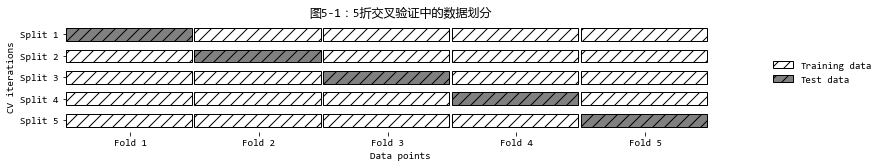

In [3]:
mglearn.plots.plot_cross_validation()
plt.title("图5-1：5折交叉验证中的数据划分")

### 5.1.1 Scikit-Learn中的交叉验证

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

# 折与折之间精度变化较大，意味着模型对于某个折出现过拟合，说明数据分布不够随机，数据量需要增大
for cv in [3, 4, 5]:
    scores = cross_val_score(logreg, iris.data, iris.target, cv=cv)
    show_subtitle(f"LogisticRegression 使用 iris 数据集经过 {cv} 折交叉验证")
    print(f"每一折切分数据得到的模型精度：{scores}")
    print(f"交叉验证的平均值：{scores.mean()}")

--------------- >LogisticRegression 使用 iris 数据集经过 3 折交叉验证< ---------------
每一折切分数据得到的模型精度：[0.98 0.96 0.98]
交叉验证的平均值：0.9733333333333333
--------------- >LogisticRegression 使用 iris 数据集经过 4 折交叉验证< ---------------
每一折切分数据得到的模型精度：[0.974 0.974 0.946 1.   ]
交叉验证的平均值：0.9733285917496444
--------------- >LogisticRegression 使用 iris 数据集经过 5 折交叉验证< ---------------
每一折切分数据得到的模型精度：[0.967 1.    0.933 0.967 1.   ]
交叉验证的平均值：0.9733333333333334


In [5]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.022, 0.023, 0.016, 0.018, 0.017]),
 'score_time': array([0.   , 0.   , 0.001, 0.   , 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [6]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.022,0.000,0.967,0.967
1,0.023,0.000,1.000,0.967
2,0.016,0.001,0.933,0.983
3,0.018,0.000,0.967,0.983
4,0.017,0.000,1.000,0.975


Mean times and scores:
 fit_time       1.920e-02
score_time     2.006e-04
test_score     9.733e-01
train_score    9.750e-01
dtype: float64


### 5.1.2 交叉验证的优点

优点：
- 相比于单次划分，数据分布更加随机
- 相比于单次划分，数据利用更加充分

缺点：增加了计算成本

### 5.1.3 Scikit-Learn中的交叉验证的各种策略

- K折交叉验证（KFold）｛不分层，最常用！｝
    - 分层K折交叉验证（StratifiedKFold）
    - 重复分层K折交叉验证（RepeatedStratifiedKFold）
    - 分组K折交叉验证（GroupKFold）
- 留P法（LeavePOut)
    - 留P组数据（LeavePGroupsOut）
    - 留一法（LeaveOneOut）
    - 留一组数据（LeaveOneGroupOut）
- 打乱划分交叉验证（ShuffleSplit）
    - 分层打乱划分交叉验证（StratifiedShuffleSplit）
    - 分组打乱划分交叉验证（GroupShuffleSplit）

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


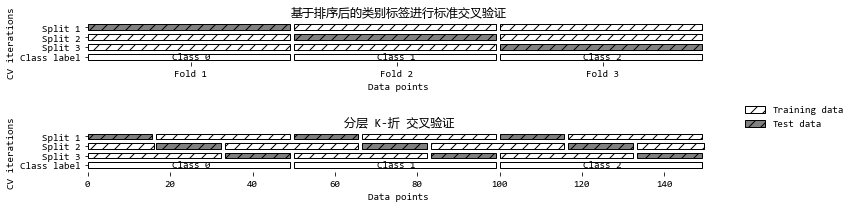

In [8]:
mglearn.plots.plot_stratified_cross_validation()
# plt.suptitle("图5-2：当数据按照类别标签排序时，标准交叉验证与分层交叉验证的对比")

#### 1. 对交叉验证的更多控制
使用 KFold 作为交叉验证分离器（cross-validation splitter) 提供给 cv 作为参数，对数据划分过程提供更加精细的控制

注：KFold 是不分层的分离器

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [10]:
kfold = KFold(n_splits=3)
print("原序不分层 Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

原序不分层 Cross-validation scores:
[0. 0. 0.]


In [11]:
kfold = KFold(n_splits=3, shuffle=False, random_state=0)
print("原序不分层 Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

原序不分层 Cross-validation scores:
[0. 0. 0.]


In [12]:
# cv=数字时，默认使用 分层K折交叉验证
print("原序带分层的 Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=3)))

原序带分层的 Cross-validation scores:
[0.98 0.96 0.98]


In [13]:
kfold=StratifiedKFold(n_splits=3)
print("原序带分层的 Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=3)))

原序带分层的 Cross-validation scores:
[0.98 0.96 0.98]


In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("乱序不分层 Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

乱序不分层 Cross-validation scores:
[0.98 0.96 0.96]


#### 2. 留一法交叉验证
每折只包含单个样本的 K 折交叉验证。

缺点：这种方法非常耗时，只适用于小型数据集。

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("cv 迭代的次数：", len(scores))
print("模型的平均精度: {:.2f}".format(scores.mean()))

cv 迭代的次数： 150
模型的平均精度: 0.97


#### 3. 打乱划分交叉验证（ShuffleSplit）

Text(0.5, 1.0, '图5-3：对10个点进行打乱划分，参数：train_size=5, test_size=2, n_splits=4')

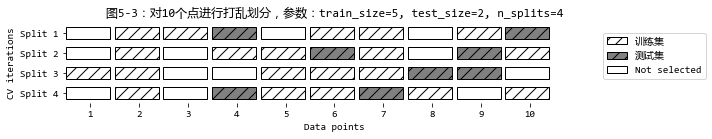

In [16]:
mglearn.plots.plot_shuffle_split()
plt.title("图5-3：对10个点进行打乱划分，参数：train_size=5, test_size=2, n_splits=4")

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[1.    0.987 0.947 0.947 0.933 0.96  0.96  0.973 0.973 0.92 ]


##### 4.分组交叉验证（GroupKFold）
以groups数据作为分组的依据。

Text(0.5, 1.0, '图5-4：用 GroupKFold 进行依赖于标签的划分')

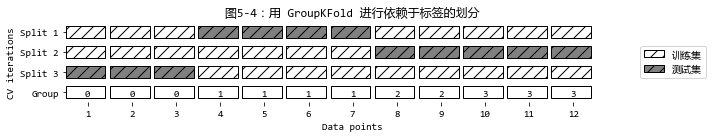

In [18]:
mglearn.plots.plot_group_kfold()
plt.title("图5-4：用 GroupKFold 进行依赖于标签的划分")

In [19]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.6   0.667]


## 5.2 网格搜索
网格搜索（grid search）：从参数的所有可能组合中找出最佳的参数设置。

### 5.2.1 简单的网格搜索

使用循环对所有参数组合分别训练并且评估一个分类器。

In [20]:
# naive grid search implementation
# 原始的网络搜索的实现
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 参数过拟合和验证集校正

如果通过测试集的评估来修正模型训练使用的参数，那么最终评估模型泛化能力时会因为评估过程的反复修正而导致泛化能力被高估。

如果增加验证集来修正模型训练使用的参数，那么最终评估模型泛化能力时，因为使用的是未知数据，所以得到的泛化性能评估更加可信。

利用测试集修正模型参数导致的误差称作将测试集的信息“泄漏”到模型中。

Text(0.5, 1.0, '图5-5：对数据进行3折划分')

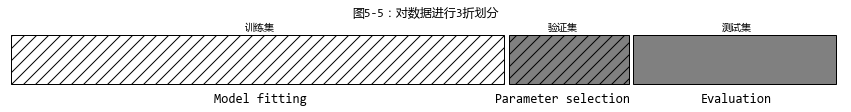

In [21]:
mglearn.plots.plot_threefold_split()
plt.title("图5-5：对数据进行3折划分")

In [22]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3 带交叉验证的网格搜索

小数据集带来的过拟合问题依然没有很好解决，因此使用交叉验证来评估每种参数组合的性能，可以得到对泛化性能的更好的估计。

1.  从相对比较稀疏并且比较小的网格开始搜索，通过分析交叉验证的结果，找出合适的参数范围
    -   将交叉验证的结果可视化有助于理解模型泛化能力对所搜索参数的依赖关系
2.  在非网格的空间中搜索
3.  使用不同的交叉验证策略进行网格搜索
    -   嵌套交叉验证：使用交叉验证对原始数据进行多次划分。
        -   外层循环，将原始数据划分为训练集和测试集多种划分
        -   内层循环，对于每种外层划分，利用最佳参数设置计算得到测试集分数。
    -   交叉验证与网格搜索并行
        -   n_jobs参数可以设置使用多个CPU内核
        -   Scikit-Learn不允许并行操作的嵌套。
            -   例如：随机森林中使用了n_jobs参数，就不能在GridSearchCV中使用n_jobs参数。
        -   IPython并行框架可以进行并行网格搜索
        -   spark-sklearn允许在建立好的Spark集群上运行网格搜索

In [23]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

Text(0.5, 0.98, '图5-6：带交叉验证的网格搜索结果')

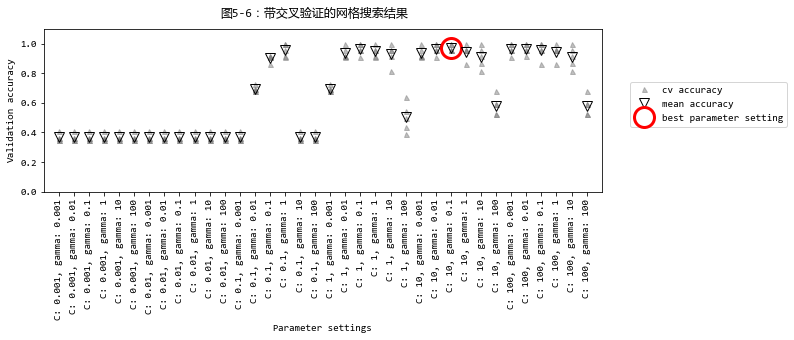

In [24]:
mglearn.plots.plot_cross_val_selection()
plt.suptitle("图5-6：带交叉验证的网格搜索结果")

Text(0, 0.125, '图5-7：用GridSearchCV进行参数选择与模型评估的过程概述')

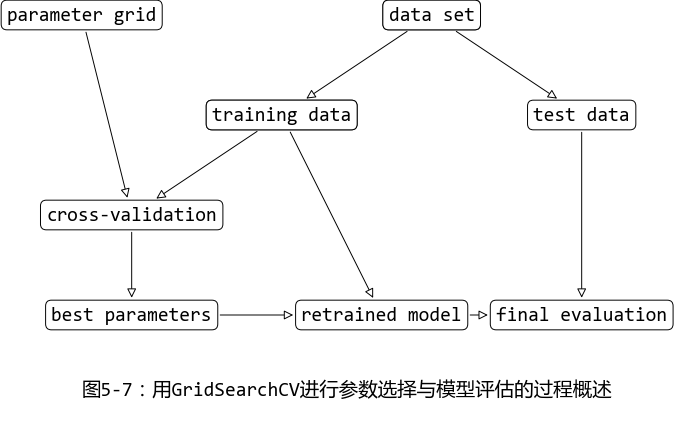

In [25]:
mglearn.plots.plot_grid_search_overview()
plt.text(0,0.125,"图5-7：用GridSearchCV进行参数选择与模型评估的过程概述",fontsize=20)

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [30]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [31]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [32]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


#### 1. 分析交叉验证的结果

In [33]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.996e-04,3.998e-04,0.000e+00,0.000e+00,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.348,0.348,0.364,0.364,0.409,0.366,0.022,22,0.371,0.371,0.367,0.367,0.356,0.366,0.006
1,6.000e-04,4.899e-04,2.000e-04,4.000e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.348,0.348,0.364,0.364,0.409,0.366,0.022,22,0.371,0.371,0.367,0.367,0.356,0.366,0.006
2,4.001e-04,4.900e-04,2.000e-04,4.000e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.348,0.348,0.364,0.364,0.409,0.366,0.022,22,0.371,0.371,0.367,0.367,0.356,0.366,0.006
3,3.994e-04,4.891e-04,3.997e-04,4.896e-04,0.001,1,"{'C': 0.001, 'gamma': 1}",0.348,0.348,0.364,0.364,0.409,0.366,0.022,22,0.371,0.371,0.367,0.367,0.356,0.366,0.006
4,7.999e-04,4.000e-04,0.000e+00,0.000e+00,0.001,10,"{'C': 0.001, 'gamma': 10}",0.348,0.348,0.364,0.364,0.409,0.366,0.022,22,0.371,0.371,0.367,0.367,0.356,0.366,0.006


Text(0.5, 0.98, '图5-8：以C和gamma为自变量，交叉验证平均分数的热图')

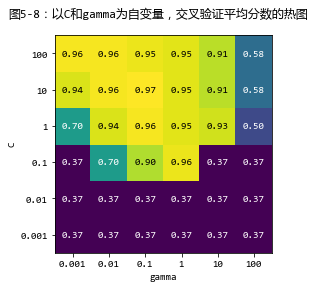

In [34]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.suptitle("图5-8：以C和gamma为自变量，交叉验证平均分数的热图")

Text(0.5, 0.98, '图5-9：错误的搜索网格的热图可视化')

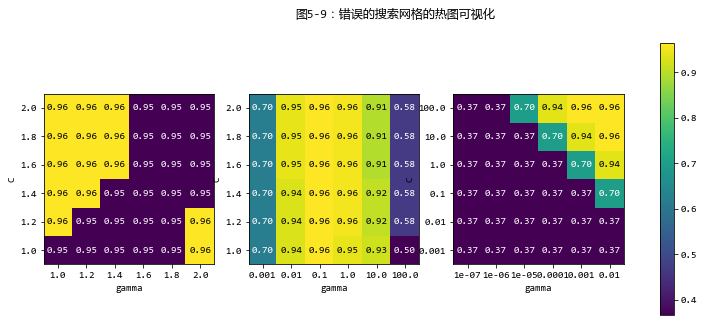

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())
plt.suptitle("图5-9：错误的搜索网格的热图可视化")

#### 2. 在非网格的空间中搜索

In [36]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [37]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [38]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000804,0.000596,0.000599,0.0006,0.000588,0.000788,0.0008,0.0004,0.0008,0.000801,0.0006,0.000602,0.0006,0.0004,0.0006,0.0002,0.0012,0.0008,0.001,0.0004,0.000598,0.0008,0.0008,0.0008,0.0006,0.0002,0,0,0.00315,0,0,0,0,0,0,0.0031,0,0,0.00313,0,0,0.00312
std_fit_time,0.000402,0.000487,0.000489,0.00049,0.000481,0.000403,0.0004,0.00049,0.0004,0.0004,0.00049,0.000491,0.00049,0.00049,0.00049,0.0004,0.00098,0.0004,1.66e-06,0.00049,0.000488,0.0004,0.0004,0.0004,0.00049,0.0004,0,0,0.00629,0,0,0,0,0,0,0.0062,0,0,0.00625,0,0,0.00625
mean_score_time,0.000401,0.0002,0.0002,0.000394,0.0002,0.0002,0,0.0002,0.0002,0,0.0004,0.0004,0.0002,0.0002,0.0004,0.0004,0,0.0012,0,0.0002,0.000203,0.0002,0.000199,0.0002,0.0002,0.0002,0.0002,0,0,0,0,0,0,0.00313,0,0,0,0,0,0,0,0
std_score_time,0.000492,0.000399,0.0004,0.000482,0.0004,0.0004,0,0.0004,0.0004,0,0.00049,0.00049,0.0004,0.0004,0.00049,0.00049,0,0.00117,0,0.0004,0.000406,0.0004,0.000399,0.0004,0.0004,0.0004,0.0004,0,0,0,0,0,0,0.00625,0,0,0,0,0,0,0,0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.696,0.913,1,0.348,0.348,0.696,0.913,1,0.957,0.913,0.391,0.913,1,1,0.957,0.87,0.522,1,1,1,0.957,0.87,0.522,0.348,0.87,1,1,1,0.957
split1_test_score,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.348,0.696,0.913,0.913,0.348,0.348,0.696,0.913,0.957,0.913,0.957,0.435,0.913,0.957,0.957,0.957,0.913,0.522,0.957,0.913,0.957,0.957,0.913,0.522,0.348,0.87,0.913,0.957,1,0.957


### 3. 使用不同的交叉验证策略进行网格搜索
交叉验证+分离器+网格搜索+模型+参数列表

##### （1）嵌套交叉验证

In [39]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


In [40]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [41]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]


##### (2) 交叉验证与网络搜索并行

注：Scikit-Learn 不允许并行操作的嵌套，如果模型中设置了 n_jobs 选项，那么 cross_val_score 中就不能再设置 n_jobs 选项。

## 5.3 评估指标与评分

- 分类性能评估：精度（正确分类的样本所占的比例）
- 回归性能评估：R^2

### 5.3.1 评估的最终目标

- 技术服务于实践。实践中的指标才是关键。

### 5.3.2 二分类问题的评估指标

#### 1. 错误类型：
-   正类（Positive Class）
    -   真正例（True Positive）：正确的阳性预测。
    -   假正例（False Positive）：错误的阳性预测，第一类错误。
-   反类（Negative Class）
    -   真反例（True Negative）：正确的阴性预测。
    -   假反例（False Negative）：错误的阴性预测，第二类错误。

#### 2. 不平衡的数据集（Imbalanced Dataset），

也叫具有不平衡类别的数据集（Dataset with Imbalanced Classes），数据集中一个类别比另一个类别出现的次数多得多。

In [42]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [43]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [45]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


#### 3. 混淆矩阵（Confusion Matrix）
-   混淆矩阵与精度：Accuracy=（TP+TN）/（TP+TN+FP+FN）；所有样本中正确预测样本的比例。
-   混淆矩阵与准确率：Precision=TP/（TP+FP）；被预测为正例的样本中正确正例的比例，
也叫阳性预测值（Positive Predictive Value，PPV）。
-   混淆矩阵与召回率：Recall=TP/（TP+FN）；所有正类样本中正确正例的比例，
也叫灵敏度（Sensitivity）、命中率（Hit Rate）和真正例率（True Positive Rate，TPR）。
-   混淆矩阵与F-度量：F=2（Precision-Recall）/（Precision+Recall）；准确率与召回率的调和平均，
也叫F-分数、F_1-分数。
    -   F-度量比精度更加符合我们对好模型的评价，但是相对于精度也更加难以解释。

In [46]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


Text(0.5, 1.0, '图5-10：“9与其他”分类任务基于 Logistic Regression 模型的混淆矩阵')

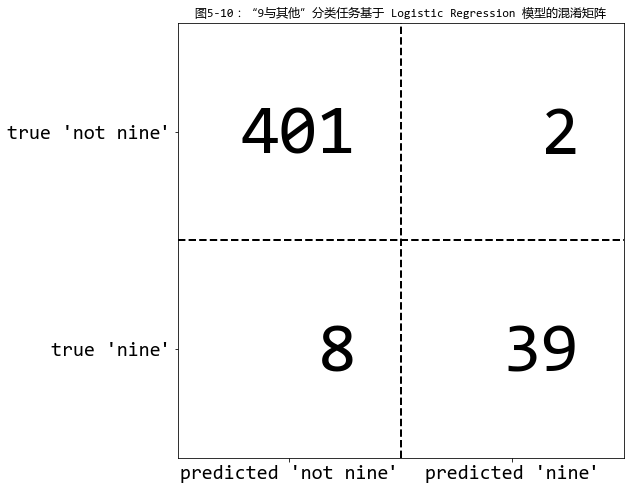

In [47]:
mglearn.plots.plot_confusion_matrix_illustration()
plt.title("图5-10：“9与其他”分类任务基于 Logistic Regression 模型的混淆矩阵")

Text(0.5, 1.0, '图5-11：二分类混淆矩阵')

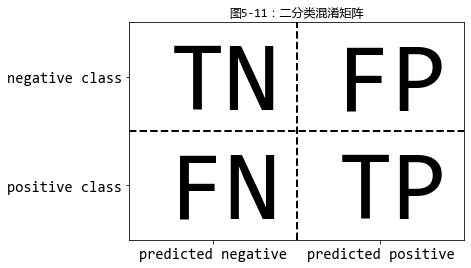

In [48]:
mglearn.plots.plot_binary_confusion_matrix()
plt.title("图5-11：二分类混淆矩阵")

In [49]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[359  44]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


##### 与精确度的关系
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### 准确率、召回率 与 f-分数
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [50]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.10
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [52]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.10      0.11      0.10        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [53]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



#### 4. 考虑不确定性
-   “宏”（Macro）平均：计算未加权的按类别f-分数。对所有类别给出相同的权重，无论类别中的样本量大小。
-   “加权”（Weighted）平均：以每个类别的支持作为权重来计算按类别f-分数的平均值。分类报告中给出的就是这个值。
-   “微”（Micro）平均：计算所有类别中假正例、假反例和真正例的总数，然后利用这些计数来计算准确率、召回率和f-分数。

In [54]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

Text(0.5, 0.98, '图5-12：决策函数的热图与改变决策阈值的影响')

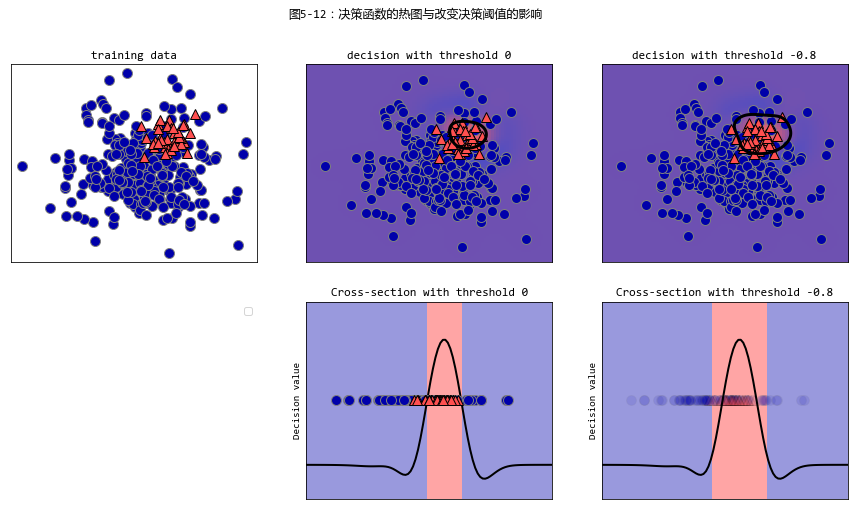

In [55]:
mglearn.plots.plot_decision_threshold()
plt.suptitle("图5-12：决策函数的热图与改变决策阈值的影响")

In [56]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [57]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [58]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



#### 5. 准确率-召回率曲线（Precisioin-Recall Curve）
帮助寻找合适的工作点（Operating Point）。

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

Text(0.5, 1.0, '图5-13：SVC（gamma=0.05）的准确率--召回率曲线\n曲线越靠近右上角，则分类器越好')

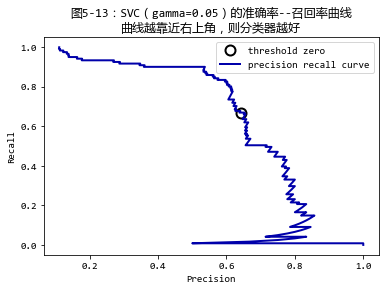

In [60]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("图5-13：SVC（gamma=0.05）的准确率--召回率曲线\n"
                "曲线越靠近右上角，则分类器越好")

Text(0.5, 1.0, '图5-14：比较 SVM 与 随机森林 的 准确率--召回率曲线\nSVM在中间位置的表现更好\n随机森林在极值处表现更好（即极值处的精度或是高准确率或是高召回率）')

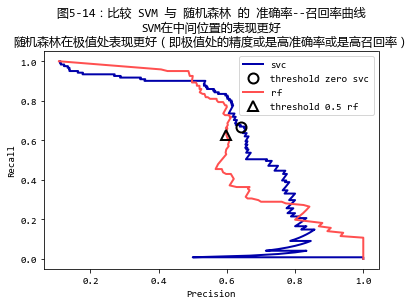

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("图5-14：比较 SVM 与 随机森林 的 准确率--召回率曲线\n"
            "SVM在中间位置的表现更好\n"
            "随机森林在极值处表现更好（即极值处的精度或是高准确率或是高召回率）")

In [62]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [63]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### 6. 受试者工作特征（Receiver Operating Characteristics Curve，ROC）与 曲线下的面积（Area Under the Curve，AUC）
- ROC：显示的是假正例率和真正例率
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

Text(0.5, 1.0, '图5-15：SVC（gamma=0.05）的ROC曲线\n曲线越靠近左上角，则分类器越好')

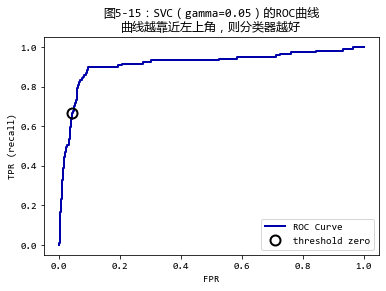

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.title("图5-15：SVC（gamma=0.05）的ROC曲线\n"
            "曲线越靠近左上角，则分类器越好")

Text(0.5, 1.0, '图5-16：比较 SVM 和 随机森林 的 ROC曲线\n曲线越靠近左上角，则分类器越好\n即假真类率（FPR）要低，真真类率（TPR）要高')

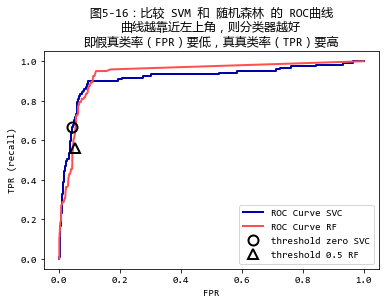

In [65]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.title("图5-16：比较 SVM 和 随机森林 的 ROC曲线\n"
            "曲线越靠近左上角，则分类器越好\n"
            "即假真类率（FPR）要低，真真类率（TPR）要高")

In [66]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


Text(0.5, 1.0, '图5-17：对比不同gamma值的SVM的ROC曲线')

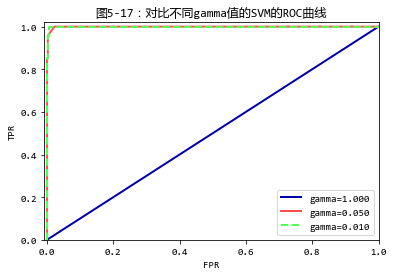

In [67]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.title("图5-17：对比不同gamma值的SVM的ROC曲线")

### 5.3.3 多分类问题的评估指标

- 混淆矩阵
- 分类报告
- f-分数

In [68]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, '图5-18：10个数字分类任务的混淆矩阵')

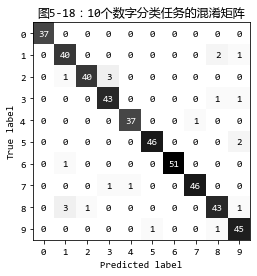

In [69]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.title("图5-18：10个数字分类任务的混淆矩阵")

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [71]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


### 5.3.4 回归问题的评估指标

R^2是评估回归模型的标准指标。

### 5.3.5 模型选择问题的评估指标

使用GridSearchCV或者cross_val_score进行模型选择时能够使用AUC等指标。

In [72]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975 0.992 1.    0.994 0.981]
Explicit accuracy scoring: [0.975 0.992 1.    0.994 0.981]
AUC scoring: [0.997 0.999 1.    1.    0.984]


In [73]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.020,0.010,0.975,0.994,0.997,0.999,0.887,0.972
1,0.019,0.009,0.992,0.996,0.999,0.999,0.958,0.982
2,0.029,0.009,1.000,0.995,1.000,0.999,1.000,0.979
3,0.019,0.008,0.994,0.996,1.000,0.999,0.972,0.982
4,0.007,0.016,0.981,0.997,0.984,1.000,0.903,0.986


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("测试集精度： {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
测试集精度： 0.973


In [75]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("测试集精度： {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
测试集精度： 1.000


In [76]:
from sklearn.metrics import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


## 5.4 小结与展望

-   交叉验证或者使用测试集可以评估一个机器学习模型的泛化能力
-   模型选择与模型评估的评估指标或者评分函数可以评估商业决策